#FITS File Handling and Image Stacking using Hubble Telescope Data
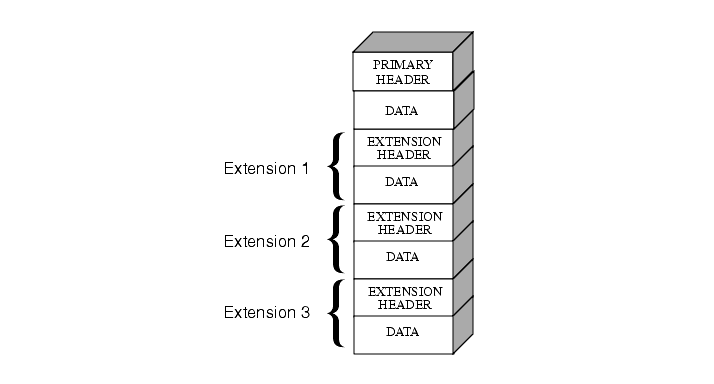


Keeping in mind how FITS files work:

We are going to probe the files for headers and important information that we can use. Then we will move onto stacking.


Today we will will work with the NGC 891 FITS file I have downloaded from the STSCI archive.


In [81]:

# Specify the path to your FITS file
fits_file_path = '/content/dss_search.fits'

# Open the FITS file
hdu_list = fits.open(fits_file_path)

# Get information about the HDU (Header/Data Unit) structure
hdu_list.info()

# Access the data of the primary HDU
data = hdu_list[0].data

# Now you can work with the data as needed
print("Data:")
print(data)
print(type(data))
print(data.shape)

Filename: /content/dss_search.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  xp.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
Data:
[[ 4514  4514  4514 ...  4160  4160  4347]
 [ 4514  4514  4774 ...  4420  4420  4087]
 [ 4336  4596  4888 ...  4290  4290  4038]
 ...
 [ 4986  5766  6611 ...  4295  4295  4165]
 [ 5506  7326  9211 ...  4295  4295  4425]
 [ 6026  8366 10381 ...  4425  4425  4555]]
<class 'numpy.ndarray'>
(893, 891)


We inspect the header to see that we have an image of 891 x 893 pixels. The Data is now in a 2D array instead of in 1s and 0s as it was in the FITS file.  We will now plot the image. It must be noted that plt.plot() won't work here as we have a 2D array. So we will used plt.imshow()

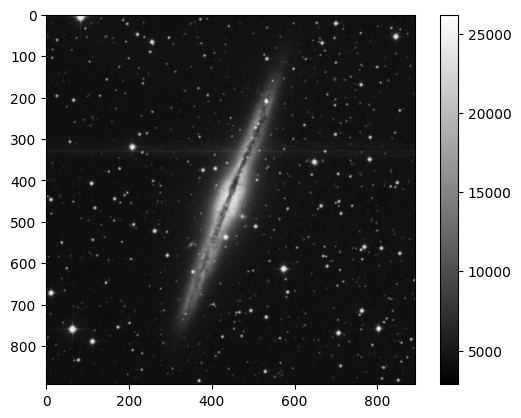

In [53]:
plt.imshow(data, cmap='gray')
plt.colorbar()


In [ ]:
As we can see, this does the job for us. We will now extract more information that will help us further.

In [55]:

print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))
print(type(data.flatten()))
print(data.flatten().shape)

Min: 2873
Max: 26190
Mean: 5178.295045766864
Stdev: 2311.4988931146495
<class 'numpy.ndarray'>
(795663,)


The above parameters give us a fair idea of where the majority of our pixels lie. The Histogram further elaborates on that.

Text(0.5, 1.0, 'Histogram of Flattened FITS File')

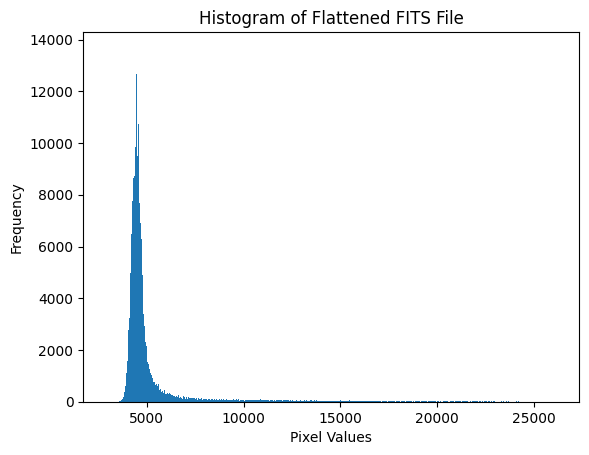

In [87]:
histogram = plt.hist(data.flatten(), bins='auto')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.title('Histogram of Flattened FITS File')

We  are now going to use a Logarithmic Scale


[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

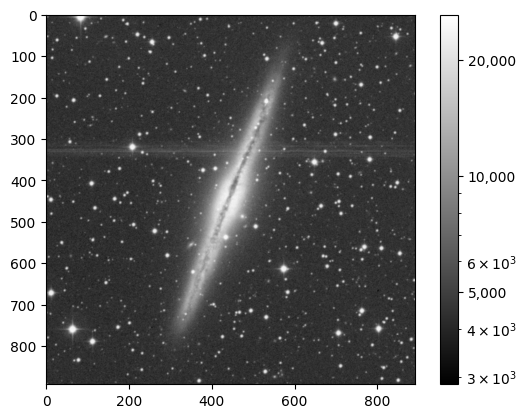

In [61]:
from matplotlib.colors import LogNorm

#Scaling it using Log
plt.imshow(data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

#Image Stacking: An RGB Approach


 We are going to stack two  images of NGC 891 captured via different surveys, on to the previously acquired image.
  

 Normalization is a common preprocessing step that scales the pixel values to a standard range, making it easier to compare and combine channels.


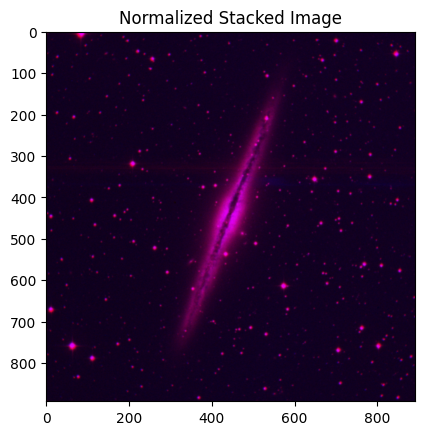

In [88]:

red_channel_path = '/content/ngc_891_img2'
blue_channel_path = '/content/ngc_891_img3'

red_channel = fits.open(red_channel_path)[0].data
blue_channel = fits.open(blue_channel_path)[0].data


red_channel = (red_channel - red_channel.min()) / (red_channel.max() - red_channel.min())
blue_channel = (blue_channel - blue_channel.min()) / (blue_channel.max() - blue_channel.min())
rgb_image = np.stack((red_channel, np.zeros_like(red_channel), blue_channel), axis=-1)

plt.imshow(rgb_image)
plt.title('Normalized Stacked Image')
plt.show()


Another way of stacking them:

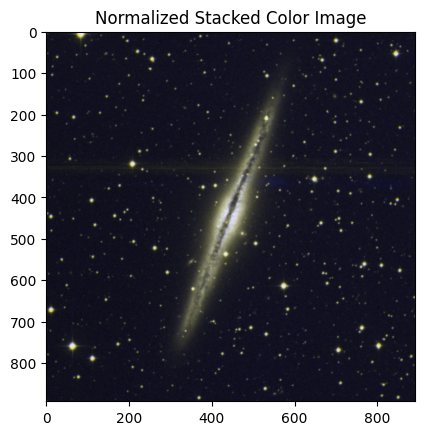

In [89]:

# Load the FITS files
red_channel_path = '/content/dss_search.fits'
green_channel_path = '/content/ngc_891_img2'
blue_channel_path = '/content/ngc_891_img3'

red_channel = fits.open(red_channel_path)[0].data
green_channel = fits.open(green_channel_path)[0].data
blue_channel = fits.open(blue_channel_path)[0].data

# Normalize the data (optional, but recommended)
red_channel = (red_channel - red_channel.min()) / (red_channel.max() - red_channel.min())
green_channel = (green_channel - green_channel.min()) / (green_channel.max() - green_channel.min())
blue_channel = (blue_channel - blue_channel.min()) / (blue_channel.max() - blue_channel.min())

# Stack the channels to create a color image
color_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

# Display the image
plt.imshow(color_image)
plt.title('Normalized Stacked Color Image')
plt.show()


I believe the two images only stack a portion and scale them. There is a better way for us to stack the images, by literally adding the images onto each other and get a fully stacked image.

In [77]:
from google.colab import files
import os

# Upload your FITS files to Colab
uploaded = files.upload()

# List all FITS files in the current working directory
fits_files = [filename for filename in uploaded.keys() if filename.endswith('.fits')]

# Create a list of full file paths
image_list = [os.path.join(os.getcwd(), filename) for filename in fits_files]

# Display the list of file paths
print("Image List:")
for image_path in image_list:
    print(image_path)

image_concat = [fits.getdata(image) for image in image_list]

Saving ngc_891_img3 to ngc_891_img3 (1)
Saving ngc_891_img2 to ngc_891_img2 (1)
Saving dss_search.fits to dss_search (1).fits
Image List:
/content/dss_search (1).fits


In [78]:
final_image = np.sum(image_concat, axis=0)

Text(0.5, 1.0, 'Histogram of the Stacked FITS File')

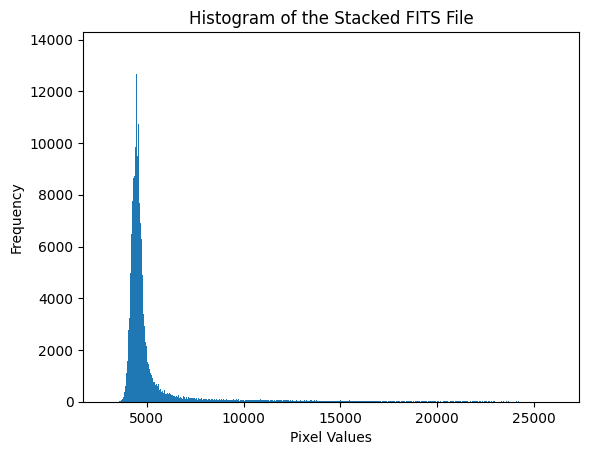

In [91]:
image_hist = plt.hist(final_image.flatten(), bins='auto')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.title('Histogram of the Stacked FITS File')

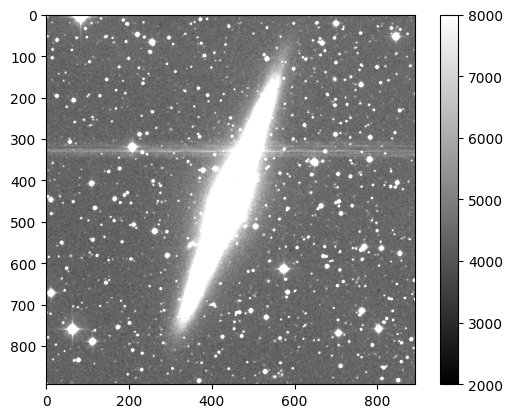

In [92]:
plt.imshow(final_image, cmap='gray', vmin=2E3, vmax=8E3)
plt.colorbar()

Woo hoo! Would you look at that!!!

We can also use a different color map to make the image look cooler!

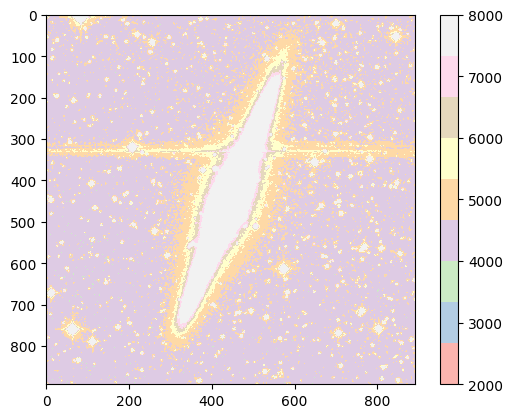

In [100]:
plt.imshow(final_image, cmap='Pastel1', vmin=2E3, vmax=8E3)
plt.colorbar()

**BLINDING! **

PS. (I confirmed the stacked images by redoing this work in DS9, this corroborates to the image in DS9 so I am assuming the fully, unnormalized, stacked image is better than the previous two)

**THE END**

Acknowledgements:

The Diagram used for explaining the FITS file Header Data Unit is from STSCI.
As are the FITS files.




